In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("./sales_data/Sales_February_2019.csv")
df.shape

(12036, 6)

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [4]:
df = pd.read_csv("./sales_data/Sales_May_2019.csv")
df.shape

(16635, 6)

In [5]:
files = [file for file in os.listdir("./sales_data")]
print(files)

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [6]:
directory = "./sales_data"
files = [file for file in os.listdir(directory) if file.endswith(".csv")]
data_frames = []
for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    data_frames.append(df)
all_data = pd.concat(data_frames, ignore_index=True)


In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [8]:
all_data.shape

(186850, 6)

Data cleaning

In [9]:
#find null values in data frame

nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [10]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [11]:
print(all_data['Order Date'])

0         12/30/19 00:01
1         12/29/19 07:03
2         12/12/19 18:21
3         12/22/19 15:13
4         12/18/19 12:38
               ...      
186845    06/07/19 19:02
186846    06/01/19 19:29
186847    06/22/19 18:57
186848    06/26/19 18:35
186849    06/25/19 14:33
Name: Order Date, Length: 185950, dtype: object


In [12]:
#function converts the values in the specified column to numeric types (integers or floats).
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [13]:
#add a column having month number
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

/var/folders/qm/wyl8zks50cx1wpzls1q1k6v00000gn/T/ipykernel_20661/1929334749.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [14]:
print(all_data['Month'])

0         12
1         12
2         12
3         12
4         12
          ..
186845     6
186846     6
186847     6
186848     6
186849     6
Name: Month, Length: 185950, dtype: int32


In [15]:
#add location based on city
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA)


Data analysis

In [16]:
#sales per month
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')


In [17]:
monthly_summary = all_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean',  # Use 'mean' to get an average price per month
    'Sales': 'sum'
})
print(monthly_summary)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  186.607105  1822256.73
2                 13449  182.787868  2202022.42
3                 17005  184.201665  2807100.38
4                 20558  184.237158  3390670.24
5                 18667  189.250581  3152606.75
6                 15253  189.023580  2577802.26
7                 16072  184.183835  2647775.76
8                 13448  186.468140  2244467.88
9                 13109  179.415893  2097560.13
10                22703  183.194696  3736726.88
11                19798  180.993608  3199603.20
12                28114  183.654155  4613443.34


range(1, 13)


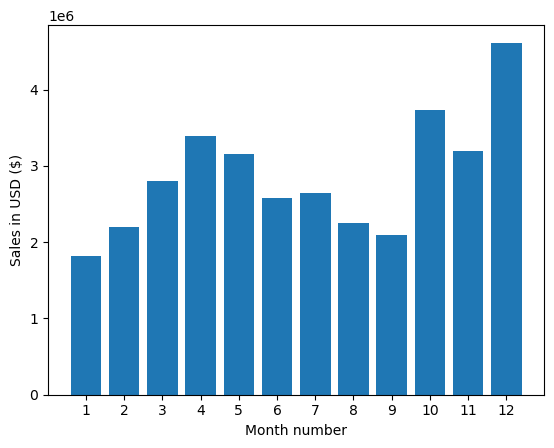

In [18]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


In [19]:
all_data.groupby(['City']).sum()
city_summary = all_data.groupby('City').agg({
    'Quantity Ordered': 'sum',
    
    'Sales': 'sum'
})
print(city_summary)

                     Quantity Ordered       Sales
City                                             
Atlanta  (GA)                   16602  2795498.58
Austin  (TX)                    11153  1819581.75
Boston  (MA)                    22528  3661642.01
Dallas  (TX)                    16730  2767975.40
Los Angeles  (CA)               33289  5452570.80
New York City  (NY)             27932  4664317.43
Portland  (ME)                   2750   449758.27
Portland  (OR)                  11303  1870732.34
San Francisco  (CA)             50239  8262203.91
Seattle  (WA)                   16553  2747755.48


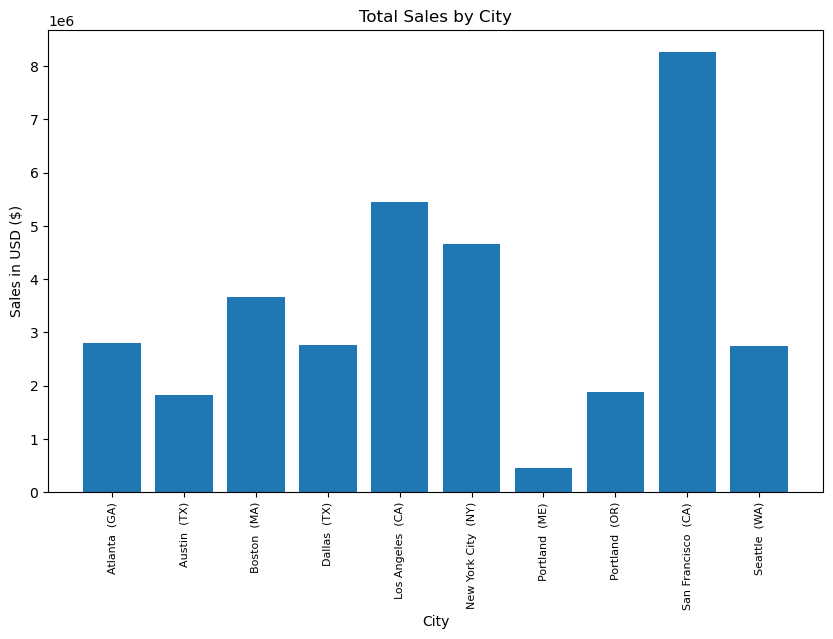

In [20]:
city_sales = all_data.groupby('City').sum()['Sales']
cities = city_sales.index
sales = city_sales.values

plt.figure(figsize=(10, 6))
plt.bar(cities, sales)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation='vertical', size=8)
plt.title('Total Sales by City')
plt.show()

#What time should we display advertisements to maximize likelihood of customer's buying product?


In [21]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

/var/folders/qm/wyl8zks50cx1wpzls1q1k6v00000gn/T/ipykernel_20661/3655867252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
/var/folders/qm/wyl8zks50cx1wpzls1q1k6v00000gn/T/ipykernel_20661/3655867252.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,12,38,1


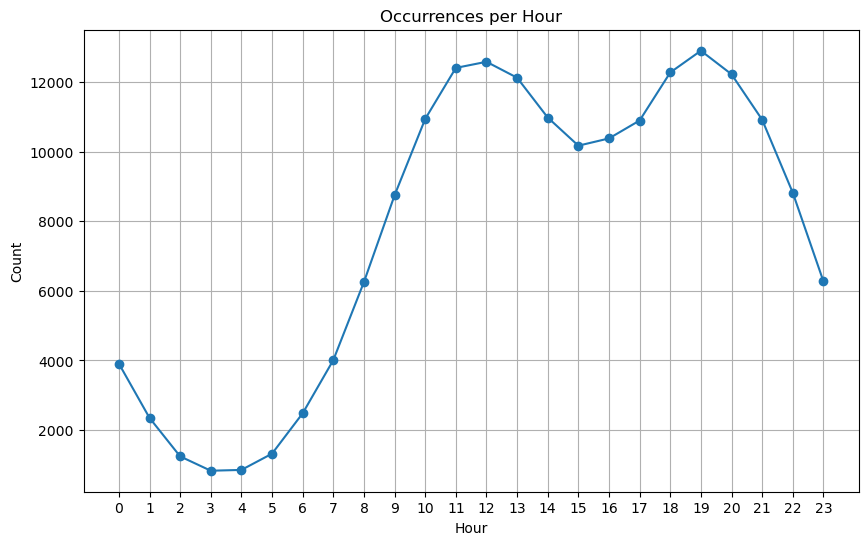

In [22]:

hourly_counts = all_data.groupby('Hour').count()['Count']
hours = hourly_counts.index
counts = hourly_counts.values

plt.figure(figsize=(10, 6))
plt.plot(hours, counts, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(hours)  # Set x-ticks to show all hours
plt.grid(True)
plt.title('Occurrences per Hour')
plt.show()


What product sold the most?

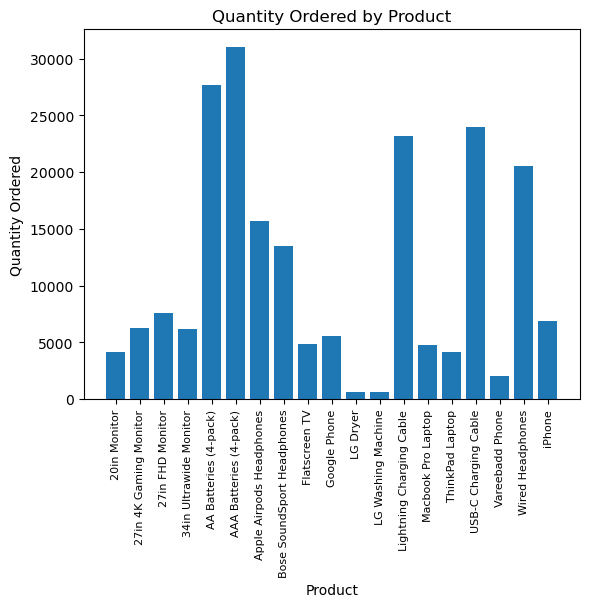

In [23]:
product_group = all_data.groupby('Product').sum()
quantity_ordered = product_group['Quantity Ordered']
plt.bar(quantity_ordered.index, quantity_ordered)
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.show()

What products are most often sold together?

In [24]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [25]:
from itertools import combinations
from collections import Counter
import pandas as pd
import numpy as np

count = Counter()

# Ensure the 'Grouped' column contains strings or empty strings
df2['Grouped'] = df2['Grouped'].fillna('').astype(str)

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('Product', 'Product') 253
('iPhone', 'Lightning Charging Cable') 93
('Google Phone', 'USB-C Charging Cable') 69
('iPhone', 'Wired Headphones') 34
('iPhone', 'Apple Airpods Headphones') 31
('Google Phone', 'Wired Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable') 26
('Google Phone', 'Bose SoundSport Headphones') 15
('Vareebadd Phone', 'Wired Headphones') 13
('USB-C Charging Cable', 'Wired Headphones') 13


In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City (NY),1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City (NY),600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City (NY),11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco (CA),149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta (GA),11.95,12,38,1


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define your features and target
X = all_data[['Product', 'Price Each', 'Quantity Ordered', 'Sales', 'Hour', 'City']]
y = all_data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Product', 'City']),
        ('num', 'passthrough', ['Price Each', 'Quantity Ordered', 'Hour'])
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Product', 'City']),
                                                 ('num', 'passthrough',
                                                  ['Price Each',
                                                   'Quantity Ordered',
                                                   'Hour'])])),
                ('model', LinearRegression())])

In [28]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.9993087763348164
